## _*Quantum Emoticon*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

For more information about how to use the IBM Q experience (QX), consult the [tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
James R. Wootton, University of Basel

***

This program aims to do some of the same jobs as "Hello World" does for classical programming.

Specifically:
* It is simple;
* It performs and understandable and relatable task;
* It demonstrates simple principles of the programming language;
* It shows how to produce and look at an output.

In [1]:
import sys
sys.path.append("../../qiskit-sdk-py/")
from qiskit import QuantumProgram
import Qconfig
import math

"Hello World" is a simple program that simply encodes this greeting into a classical computer, and then prints it to screen. The most obvious quantum version is to do exactly the same, encoding the string into qubits rather than bits. However, this is not possible with current technology. ASCII encoding of "Hello World" requires nearly 100 bits of storage, and each of these would require its own qubit. There is therefore simply not enough qubits on any current device.

However, two ASCII characters require only 16 (qu)bits. Writing an emoticon like ;) can therefore be done using *ibmqx5*.

The string corresponding to ;) is
    
    ;)  =  '0011101100101001'

Since all qubits are initialized in state 0, writing this bit string using qubits requires us to apply a NOT gate to every qubit that corresponds to a bit in state 1. We can do this using the gate X. If we number the bits from 0 to 15, from right to left, this an X on qubits 0, 3, 5, 8, 9, 11, 12, 13. 

Of course, just writing a bit string in some qubits isn't very quantum. Instead we can prepare a superposition of two different emoticons. We choose ;) and 8), which correspond to the bit strings

    8)  =  '0011100000101001'
    ;)  =  '0011101100101001'

Note that these strings differ only on bits 8 and 9. It is therefore only these on which the superposition must be prepared. The superposition will be of the '00' of 8), and the '11' of ;) , and so will be a standard [Bell state](https://github.com/QISKit/qiskit-tutorial/blob/master/2_quantum_information/superposition_and_entanglement.ipynb).

We'll now implement this and run it for 1024 shots.

In [2]:
qp = QuantumProgram()
qp.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url

# set up registers and program
qr = qp.create_quantum_register('qr', 16)
cr = qp.create_classical_register('cr', 16)
qc = qp.create_circuit('smiley_writer', [qr], [cr])

# rightmost eight (qu)bits have ')' = 00101001
qc.x(qr[0])
qc.x(qr[3])
qc.x(qr[5])

# second eight (qu)bits have superposition of
# '8' = 00111000
# ';' = 00111011
# these differ only on the rightmost two bits
qc.h(qr[9]) # create superposition on 9
qc.cx(qr[9],qr[8]) # spread it to 8 with a cnot
qc.x(qr[11])
qc.x(qr[12])
qc.x(qr[13])

# measure
for j in range(16):
    qc.measure(qr[j], cr[j])

# run and get results
results = qp.execute(["smiley_writer"], backend='ibmqx5', shots=1024, silent=False)
stats = results.get_counts("smiley_writer")

running on backend: ibmqx5
status = RUNNING (5 seconds)
status = RUNNING (10 seconds)
status = RUNNING (15 seconds)
status = RUNNING (20 seconds)


The results in *stats* tell us how many times each bit string was found as a result. To print the result in an understandable way, we can convert the bit strings into ASCII characters. We can also calculate the fraction of shots for which each result occurred. This processed data makes up *emoticonDict*.

In [3]:
characterDict = {}
for bitString in stats: # loop over all results
    char1 = chr(int( bitString[0:8] ,2)) # get string of leftmost 8 bits an convert to an ASCII character
    char2 = chr(int( bitString[8:16] ,2)) # same for string of leftmost 8 bits
    characterDict[ char1 + char2 ] = stats[bitString] / 1024

Finally it is time to make an actual emoticon. We'll make an image in which the all the characters included in the result are printed on top of each other. The alpha channel is set to the fraction of shots for which that result occurred. Ideally this should be equally split between 8) and ;), but noise will mean some other stuff will turn up too.

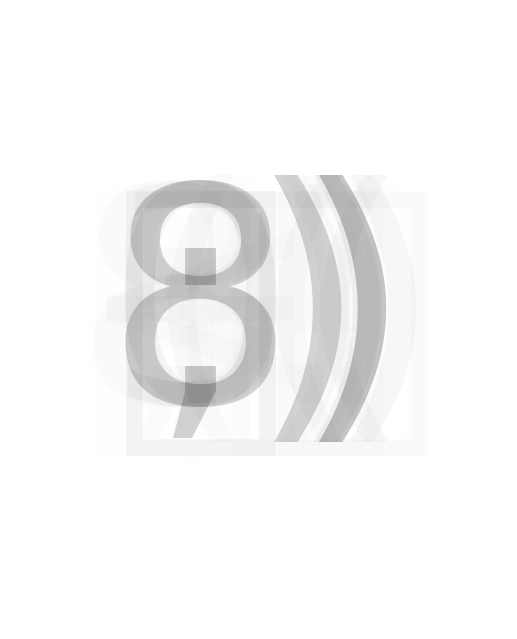

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='sans-serif')
for char in characterDict.keys():
    # plot all characters on top of each other with alpha given by how often it turned up in the output
    plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0,characterDict[char]), size = 300)
plt.axis('off')
plt.show()

And there you have it. We took one of the world's most advanced devices and made a smiley with it. A quantum smiley!